In [1]:
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
stan_model = pystan.StanModel(file="model/model4-5.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_760fa0b78af0bbaaa934d1350faefc45 NOW.


In [4]:
data = {
    "N": len(df),
    "X": df["X"],
    "Y": df["Y"],
}
fit = stan_model.sampling(
    data=data,
    pars=["b", "sigma"],
    init=lambda: {
        "a": np.random.uniform(-10, 10),
        "b": np.random.uniform(0, 10),
        "sigma": 10,
    },
    seed=123,
    chains=3,
    iter=1000,
    warmup=200,
    thin=2
)

In [5]:
fit

Inference for Stan model: anon_model_760fa0b78af0bbaaa934d1350faefc45.
3 chains, each with iter=1000; warmup=200; thin=2; 
post-warmup draws per chain=400, total post-warmup draws=1200.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b      21.88    0.06   1.53  18.67  20.88  21.95  22.88  24.86    709    1.0
sigma  84.44    0.57   16.1   59.7  73.48  82.58  92.78 120.31    788    1.0
lp__   -93.6    0.05   1.29 -96.77 -94.21 -93.27 -92.68 -92.14    639    1.0

Samples were drawn using NUTS at Mon Feb 19 01:10:55 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

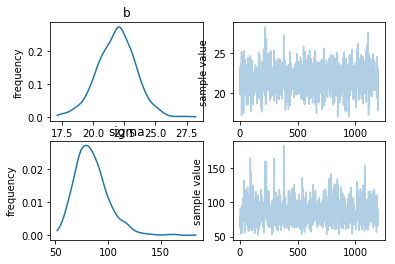

In [6]:
fit.plot()
plt.show()